In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('full_dataset_v2.csv', sep=';')
df = df[['Site_Soil_Classification_Name', 'Site_Soil_Texture_Name', 
         'Site_Soil_pH', 'Site_Precipitation_mm', 'Crop_Species_Common_Name', 
         'Crop_Yield_Grain', 'Crop_Date_From_Seeding_To_Harvest_Day_Number', 
         'Site_Temperature_Celsius', 'Averege_Humidity', 'Averege_Solar']]
df = pd.get_dummies(df, columns=['Site_Soil_Classification_Name'])
df = pd.get_dummies(df, columns=['Site_Soil_Texture_Name'])
df = pd.get_dummies(df, columns=['Crop_Species_Common_Name'])


In [9]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, X_train, X_text, y_train, y_test):
    prediction_train = estimator.predict(X_train)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_train)
    prediction_test = estimator.predict(X_text)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_test)

        
def split_samples_train_test(percent, X_all, y_all):
    from sklearn.model_selection import train_test_split
    num_train = percent
    # Set the number of testing points
    num_test = X_all.shape[0] - num_train
    # TODO: Shuffle and split the dataset into the number of training and testing points above
    ## Taking the sugestion of the reviwer to use stratify (nice! Thanks!)
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, random_state=42)
    # Show the results of the split
    print("Training set has "+str(X_train.shape[0])+" samples.")
    print("Testing set has "+str(X_test.shape[0])+" samples.")
    return X_train, X_test, y_train, y_test

In [10]:
'''
#missing with 999
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(-999)
df['Averege_Solar'] = df['Averege_Solar'].fillna(-999)

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(-999)
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(-999)
'''

"\n#missing with 999\ndf['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(-999)\ndf['Averege_Solar'] = df['Averege_Solar'].fillna(-999)\n\ndf['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(-999)\ndf['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(-999)\n"

In [11]:
'''
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(0)
df['Averege_Solar'] = df['Averege_Solar'].fillna(0)

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(0)
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(0)
'''

"\ndf['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(0)\ndf['Averege_Solar'] = df['Averege_Solar'].fillna(0)\n\ndf['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(0)\ndf['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(0)\n"

In [12]:
df['Site_Soil_pH'] = df['Site_Soil_pH'].fillna(np.mean(df['Site_Soil_pH']))
df['Averege_Solar'] = df['Averege_Solar'].fillna(np.mean(df['Averege_Solar']))

df['Site_Precipitation_mm'] = df['Site_Precipitation_mm'].fillna(np.mean(df['Site_Precipitation_mm']))
df['Crop_Date_From_Seeding_To_Harvest_Day_Number'] = df ['Crop_Date_From_Seeding_To_Harvest_Day_Number'].fillna(365)

In [13]:
X_all = df.drop(['Crop_Yield_Grain'], axis=1)
y_all = df['Crop_Yield_Grain']

In [14]:
numeric_features = X_all.loc[:,['Site_Soil_pH',
                                   'Site_Precipitation_mm',
                                   'Crop_Date_From_Seeding_To_Harvest_Day_Number',
                                   'Site_Temperature_Celsius',
                                  'Averege_Humidity',
                                  'Averege_Solar']]


numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

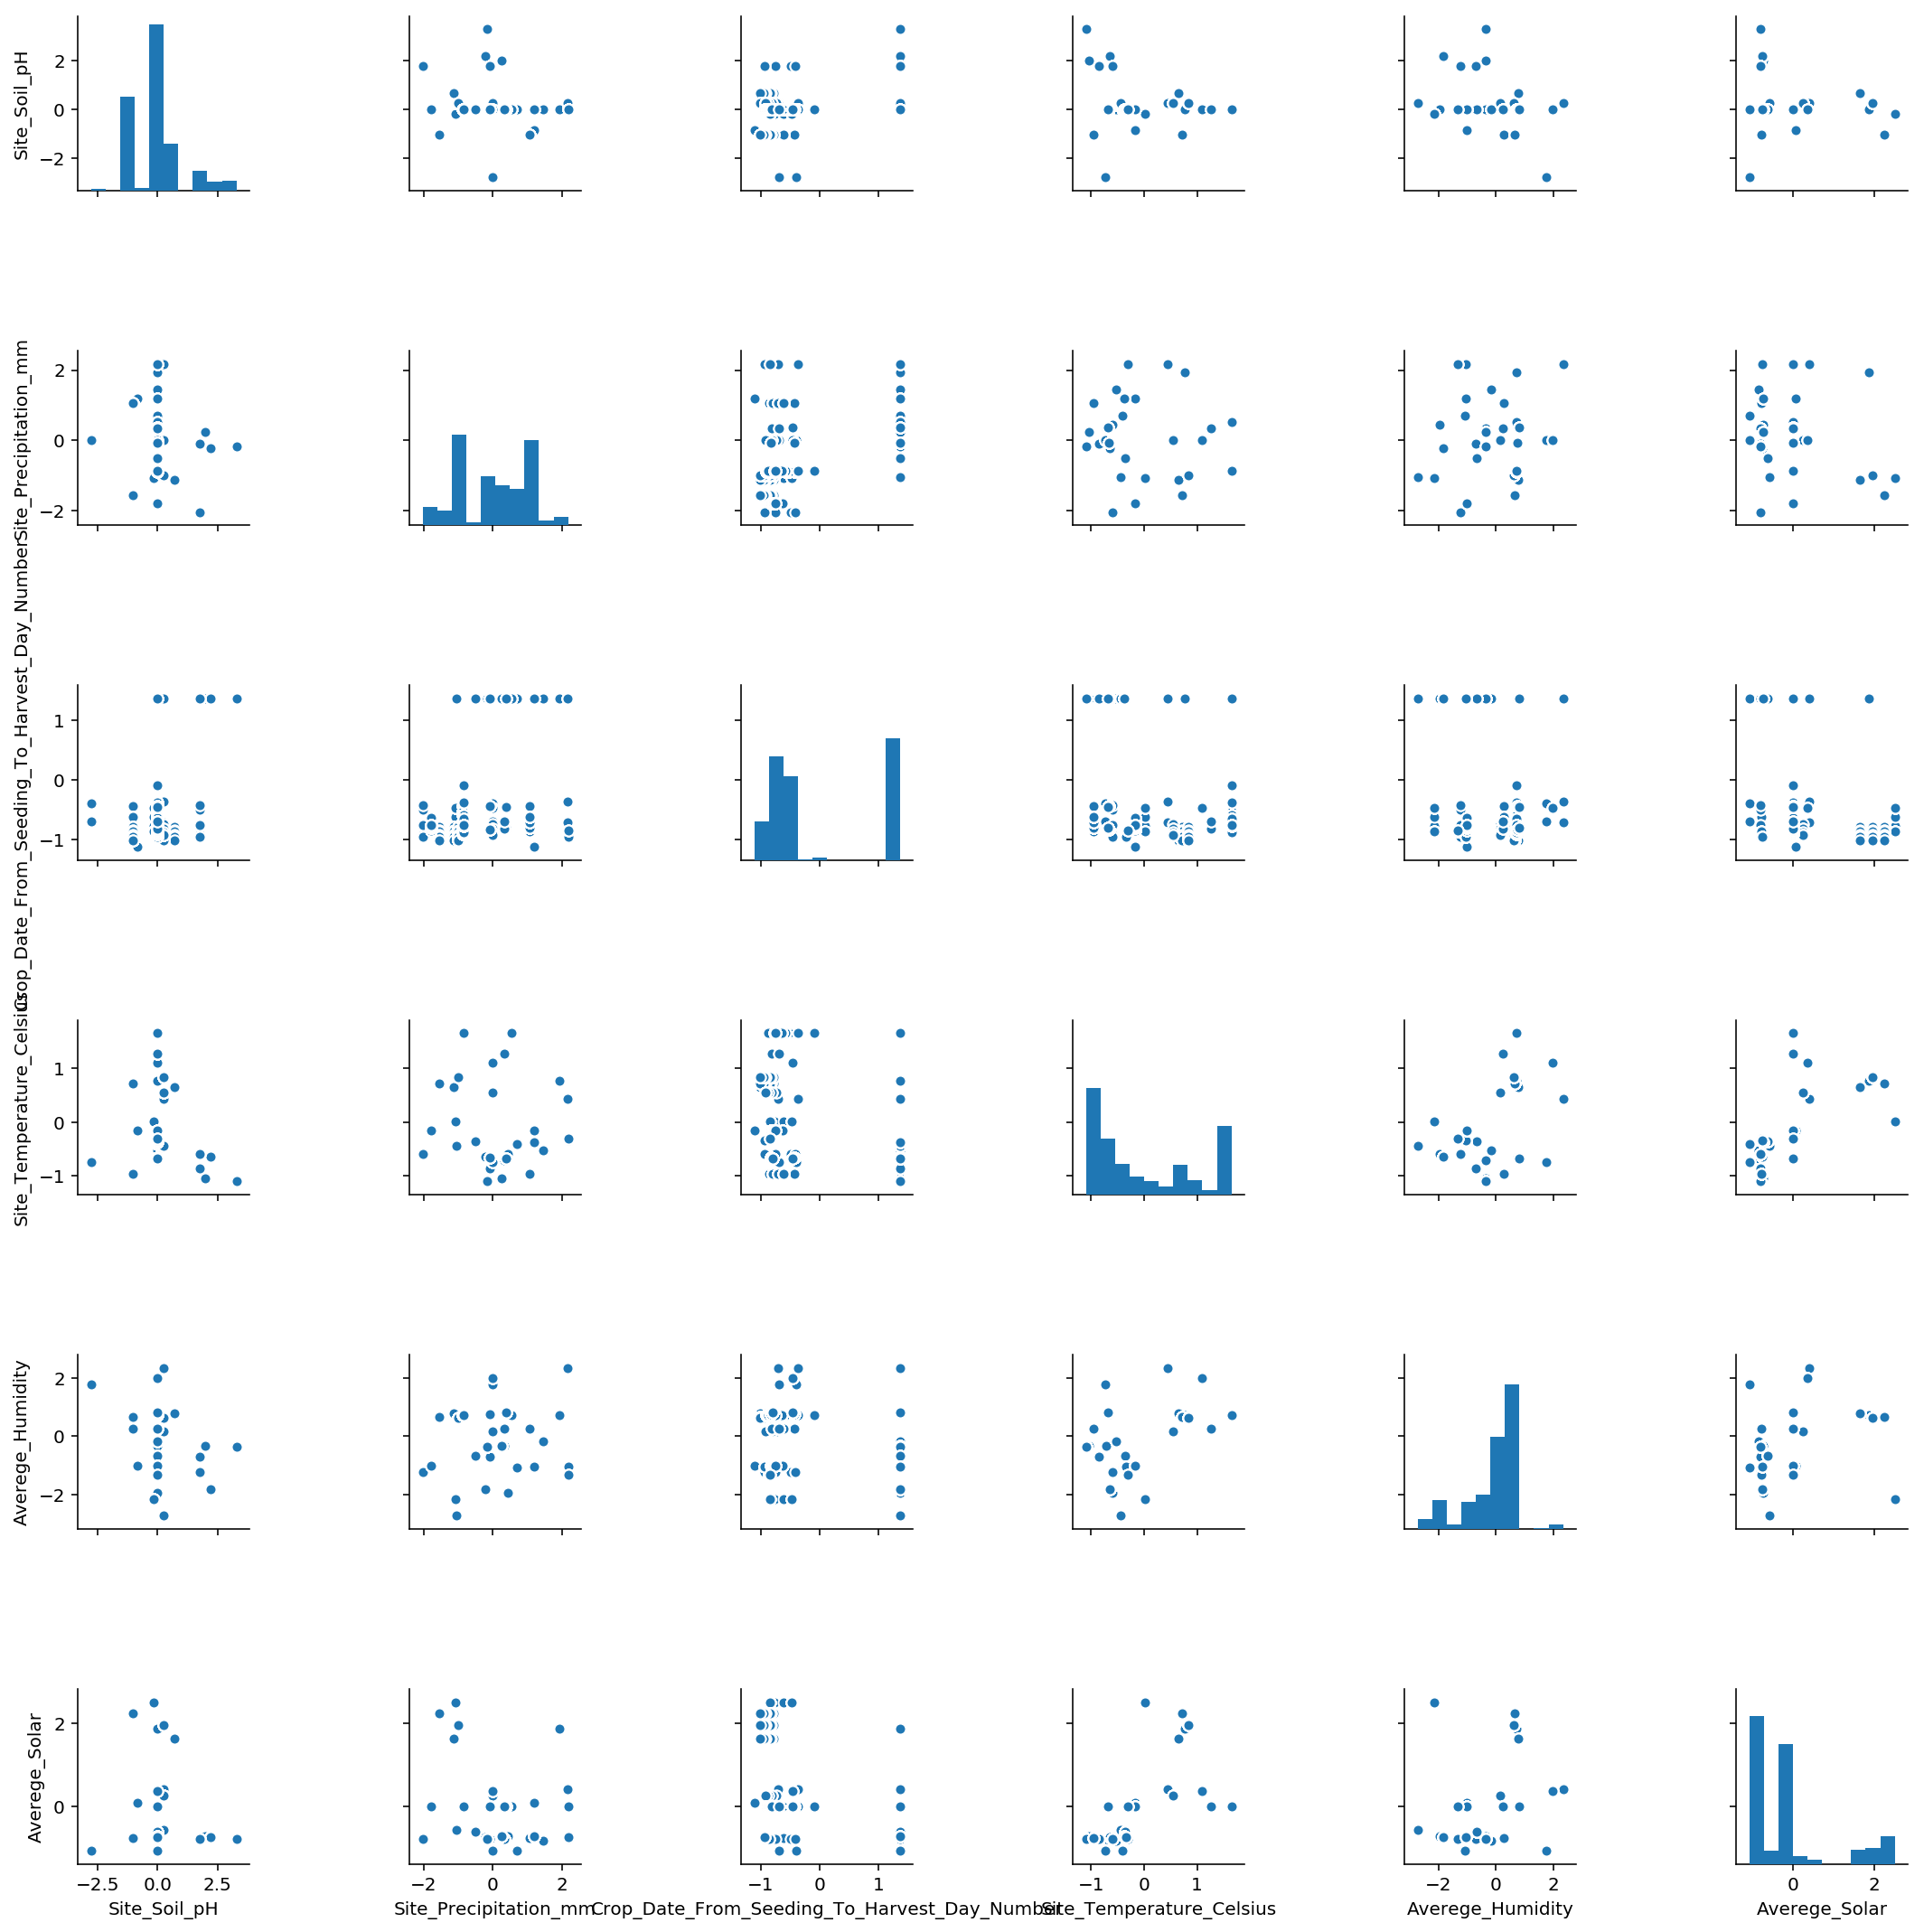

In [15]:
ax = sns.pairplot(numeric_features_standardized)

In [16]:
#Standarding features
features_standardized = X_all.copy()
features_standardized.update(numeric_features_standardized)

In [17]:
#Standarding labels
labels_st = (y_all - y_all.mean())/y_all.std()
labels_standardized = y_all.copy()
labels_standardized.update(labels_st)

In [18]:
X_train, X_test, y_train, y_test = split_samples_train_test(0.7, features_standardized, labels_standardized)

Training set has 1232 samples.
Testing set has 528 samples.


In [19]:
X_test, X_val, y_test, y_val = split_samples_train_test(0.7, X_test, y_test)

Training set has 369 samples.
Testing set has 159 samples.


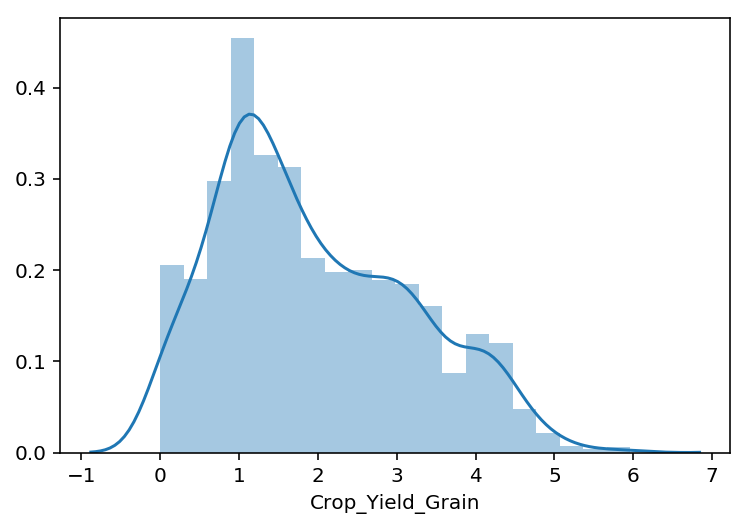

In [20]:
ax = sns.distplot(y_all)

In [21]:
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle


In [16]:
#Withou fill missing
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303


In [17]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303


In [18]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303


In [19]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.05)


In [20]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.7649646146413751
RMSE: 0.42915278499022136
Test
R2: 0.7355720958266898
RMSE: 0.4552970680530835


In [21]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.05)


In [22]:

scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.10)


In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(GBest.predict(X_val), y_val)

0.19889894905941224

In [24]:
mean_squared_error(ENSTest.predict(X_val), y_val)

0.2994965170407097

In [25]:
mean_squared_error((ENSTest.predict(X_val)+ GBest.predict(X_val))/2, y_val)

0.22590615087338542

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

In [27]:
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8295895688242807
RMSE: 0.3786537546939247
Test
R2: 0.7935187290512241
RMSE: 0.41237747996934565


In [28]:
scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
train_test(clf, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8297386715778552
RMSE: 0.37885629880304844
Test
R2: 0.7956867528512682
RMSE: 0.4106128345113146


In [30]:
train_test(clf, X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8297386715778552
RMSE: 0.37885629880304844
Test
R2: 0.7956867528512682
RMSE: 0.4106128345113146


In [31]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.06)


In [32]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.09)


In [33]:
mean_squared_error((clf.predict(X_val)+ GBest.predict(X_val))/2, y_val)

0.18457334631674402

In [34]:
list(X_all)

['Site_Soil_pH',
 'Site_Precipitation_mm',
 'Crop_Date_From_Seeding_To_Harvest_Day_Number',
 'Site_Temperature_Celsius',
 'Averege_Humidity',
 'Averege_Solar',
 'Site_Soil_Classification_Name_Aquic Hapludoll (Normania-Ves series)',
 'Site_Soil_Classification_Name_Arenic Paleudult (Kendrick series)',
 'Site_Soil_Classification_Name_Argialboll (Latah series)',
 'Site_Soil_Classification_Name_Aridic Argiboroll and Typic Natriboralf (Kevin-Elloam and Scobey-Kevin series)',
 'Site_Soil_Classification_Name_Aridic Argiustoll',
 'Site_Soil_Classification_Name_Aridic Argiustoll (Weld series)',
 'Site_Soil_Classification_Name_Calcic Haploxeroll (Staley series)',
 'Site_Soil_Classification_Name_Entic Hapludoll (Hubbard series)',
 'Site_Soil_Classification_Name_Pachic Haplustoll (Temvik-Wilton series)',
 'Site_Soil_Classification_Name_Pachic Haplustoll (Wilton)',
 'Site_Soil_Classification_Name_Pachic Ultic Haploxeroll (Palouse series)',
 'Site_Soil_Classification_Name_Typic Calciboroll (Judith se

## Randon Forest Regressor

In [35]:
#With na filled with -999

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8292036107544893
RMSE: 0.37868293562479755
Test
R2: 0.7931462710440431
RMSE: 0.41234778890285784
Accuracy: 0.72 (+/- 0.09)


In [36]:
#With na filled with 0

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8297619237135456
RMSE: 0.3787194608784065
Test
R2: 0.794526741528925
RMSE: 0.4116640130619302
Accuracy: 0.72 (+/- 0.09)


In [37]:
#With na filled with mean

scorer = make_scorer(mean_squared_error, False)

clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
clf.fit(X_train, y_train)
train_test(clf, X_train, X_test, y_train, y_test)
scorer = make_scorer(mean_squared_error, False)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.8297853702651846
RMSE: 0.3785534526975979
Test
R2: 0.7928286319218376
RMSE: 0.41336176187388207
Accuracy: 0.73 (+/- 0.09)


---

## Gradient Boost

In [38]:
#with missing 999
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.7695665825596214
RMSE: 0.426891679011019
Test
R2: 0.7402917442799606
RMSE: 0.45397930942514686
Accuracy: 0.60 (+/- 0.12)


In [39]:
#with missing 0
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.7694508974592484
RMSE: 0.4269271257460107
Test
R2: 0.7422046351744283
RMSE: 0.4527676647570983
Accuracy: 0.60 (+/- 0.11)


In [40]:
#with missing mean
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.7678136909390522
RMSE: 0.4278900547690041
Test
R2: 0.7401941122388757
RMSE: 0.45369621532850773
Accuracy: 0.60 (+/- 0.11)


---

## Elastic Net

In [41]:
#with nan 999
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303
Accuracy: 0.63 (+/- 0.06)


In [42]:
#with nan 0
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303
Accuracy: 0.63 (+/- 0.06)


In [43]:
#with nan mean
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest, X_train, X_test, y_train, y_test)
scores = cross_val_score(ENSTest, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.5896550152291744
RMSE: 0.5323686480586843
Test
R2: 0.558000021428251
RMSE: 0.5710665304834303
Accuracy: 0.63 (+/- 0.06)


---

### SVR

In [44]:
from sklearn.svm import SVR
svr = SVR(kernel='linear').fit(X_train, y_train)
train_test(svr, X_train, X_test, y_train, y_test)
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: 0.5407269708801918
RMSE: 0.5615168747649365
Test
R2: 0.4545547161718394
RMSE: 0.6325520024285933
Accuracy: 0.55 (+/- 0.18)


---

### XGBOOST

In [30]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.09, gamma=0, subsample=0.9,
                           colsample_bytree=1, max_depth=9)
xgb_r = xgb.fit(X_train, y_train)
train_test(xgb_r, X_train, X_test, y_train, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)
R2: 0.8321448305491025
RMSE: 0.3765585236714196
Test
R2: 0.7841456725754671
RMSE: 0.42494169429431294


In [32]:
scores = cross_val_score(xgb_r, X_test, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.28)


### Predicting

In [45]:
#RF
mean_squared_error(clf.predict(X_val), y_val)

0.19845573008598766

In [46]:
#GB
mean_squared_error(GBest.predict(X_val), y_val)

0.19748276478565752

In [47]:
#EN

mean_squared_error(ENSTest.predict(X_val), y_val)

0.2994965170407097

In [48]:
mean_squared_error((clf.predict(X_val) + GBest.predict(X_val) )/ 2, y_val)

0.18382602981458487

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.27 (+/- 0.28)
RF: -0.271051 (0.139264)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.39 (+/- 0.33)
Gboost: -0.385077 (0.163165)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.37 (+/- 0.21)
Elastic Net: -0.373514 (0.104041)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Accuracy: -0.44 (+/- 0.30)
SVR: -0.438790 (0.152462)


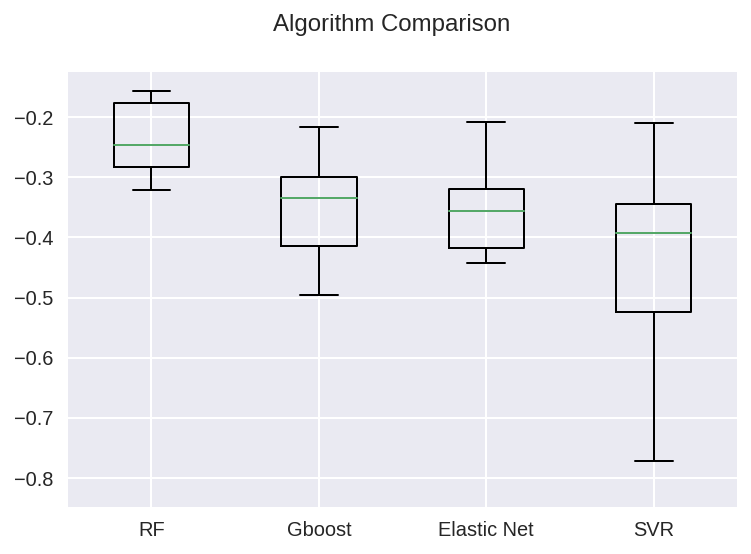

In [65]:
# prepare models
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('RF', clf))
models.append(('Gboost', GBest))
models.append(('Elastic Net', ENSTest))
models.append(('SVR', svr))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='mean_squared_error')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    results.append(scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
teste = pd.DataFrame(results)
print(results)
teste.T.to_csv("mse.csv")

[array([0.67272095, 0.86569266, 0.85861686, 0.48546702, 0.83439239,
       0.69052379, 0.66111667, 0.8412602 , 0.65356059, 0.74389121]), array([0.5359016 , 0.73564426, 0.6657902 , 0.39505664, 0.71933361,
       0.71438544, 0.64963026, 0.49540191, 0.57259005, 0.77312997]), array([0.56846078, 0.64064874, 0.7277935 , 0.53213595, 0.69834269,
       0.61880015, 0.5506147 , 0.79318405, 0.57418936, 0.60855693]), array([0.60828722, 0.5145704 , 0.71643497, 0.41812161, 0.6533819 ,
       0.57863753, 0.50842156, 0.79086591, 0.31912238, 0.56141566])]


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.27 (+/- 0.29)
RF: -0.271669 (0.145180)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.39 (+/- 0.33)
Gboost: -0.387224 (0.165202)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

Accuracy: -0.37 (+/- 0.21)
Elastic Net: -0.373514 (0.104041)


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Accuracy: -0.44 (+/- 0.30)
SVR: -0.438790 (0.152462)


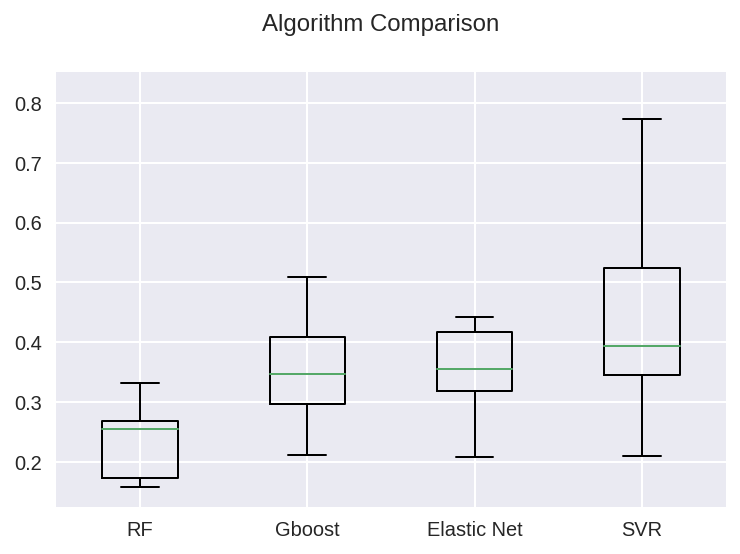

In [51]:
# prepare models
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
models.append(('RF', clf))
models.append(('Gboost', GBest))
models.append(('Elastic Net', ENSTest))
models.append(('SVR', svr))
# evaluate each model in turn
results = []
names = []
scoring = 'auc'
for name, model in models:
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='mean_squared_error')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    results.append(-1*scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, scores.mean(), scores.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV
#Create the parameters list we wish to check the tune
parameters = [{'n_estimators': [5, 10, 20, 50, 100, 200, 500, 1000, 3000], 'max_depth': [3, 5, 7, 10, 15, 20], 'random_state': [42]}]


# Initialize the classifier
clf = RandomForestRegressor(random_state=42)

# Make an Accuracy scoring function using 'make_scorer' 

# Perform grid search on the classifier using the accuracy as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring='mean_squared_error', cv=5, verbose=1)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

In [53]:
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [54]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='mean_squared_error')

/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/favoretti/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_

In [55]:
scores.mean()

-0.2710513102025101

In [56]:
mean_squared_error((clf.predict(X_val) + GBest.predict(X_val) )/ 2, y_val)

0.18491747080723983

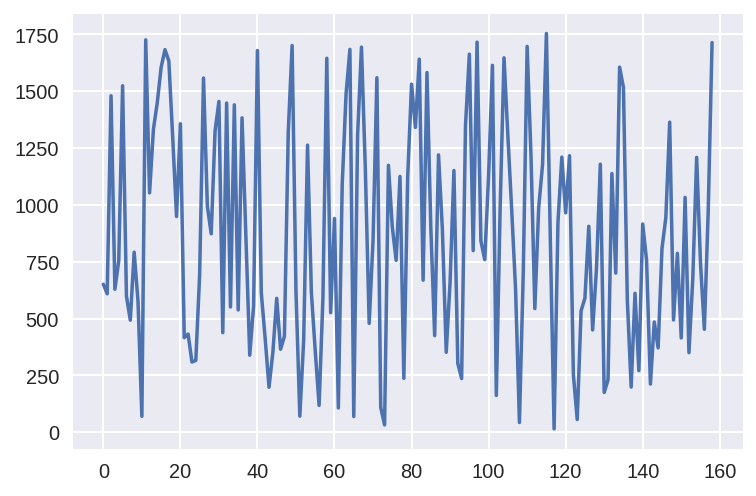

In [57]:
plt.plot(y_val.index)

In [58]:
clf.predict(X_val)

array([-0.8608772 ,  1.29169225,  0.68190099, -0.66242306,  1.29169225,
       -0.26771099,  1.29169225, -0.48347982,  1.29169225,  0.68181728,
       -0.79755152,  1.53704327, -1.57967968, -0.8396632 ,  0.88307134,
        0.17870423,  0.56417038,  0.17870423,  1.57885087, -0.31221636,
       -0.43583936, -1.17030472, -1.04395186, -0.69598347, -0.25531072,
        0.09361236, -0.87965184, -1.46406246,  0.00210574, -1.33803152,
        0.88307134,  0.88850013,  0.88307134,  1.29169225, -0.80297304,
       -0.41617795, -0.77607868,  0.44767071,  0.2961524 ,  1.29169225,
        0.56417038, -0.66242306, -1.11633585,  1.7076426 , -1.27908223,
        0.68181728,  0.06218492, -1.4662723 , -1.33803152,  0.23979384,
       -0.66242306, -0.79755152, -1.11633585, -0.44508601, -0.66242306,
       -0.84468166, -0.67366734,  1.29169225,  0.17870423,  1.29169225,
        0.41602905, -0.24687052,  0.35156903, -0.96062664,  0.23979384,
       -0.79755152,  1.57885087,  1.53704327, -0.45629373,  1.29

In [59]:
df_y_val = pd.DataFrame(y_val).reset_index()
df_y_val['predict'] =  clf.predict(X_val)

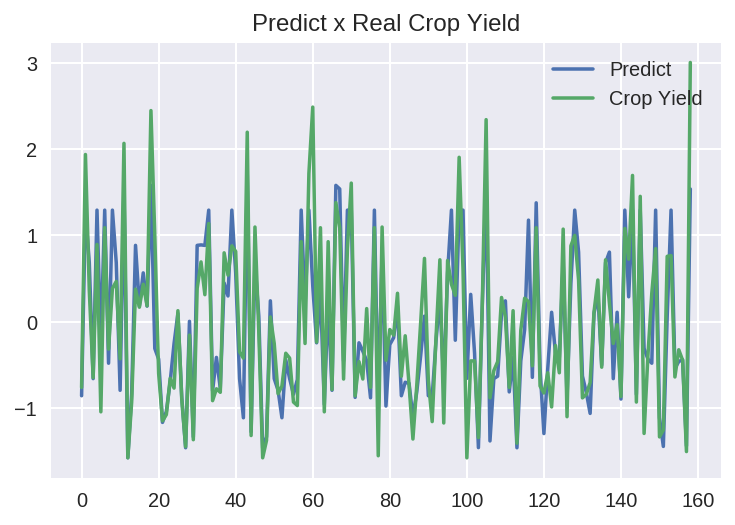

In [60]:
plt.plot(df_y_val.index, df_y_val['predict'].values.T)
plt.plot(df_y_val.index, df_y_val['Crop_Yield_Grain'].values.T)
plt.legend(['Predict', 'Crop Yield'])
plt.title('Predict x Real Crop Yield')

In [61]:
df_y_val.to_csv('predicts.csv', index=False)

In [62]:
X_all.shape

(1760, 65)

In [63]:
df.shape

(1760, 66)